In [2]:
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd


df=pd.read_csv('/Users/parmikenia/Desktop/internship codes/validation dataset2.csv')

X = df.drop(columns=['Customer_ID','Credit_Score'])
y = df['Credit_Score']

# Assuming your features are in X and target variable in y
# Step 1: Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA to reduce dimensionality
# Specify the number of components or set n_components as a float between 0 and 1 to keep the desired explained variance
pca = PCA(n_components=0.95)  # Adjust this value as needed for explained variance
X_pca = pca.fit_transform(X_scaled)

# Step 3: Fit the Gradient Boosting Machine on the PCA-transformed data
gbm = GradientBoostingRegressor()
gbm.fit(X_pca, y)

# Predict using the fitted model (if needed, using the same PCA-transformed features)
y_pred = gbm.predict(X_pca)

# To display the number of components selected and explained variance ratio
print("Number of PCA components:", pca.n_components_)
print("Explained variance ratio:", pca.explained_variance_ratio_)

Number of PCA components: 6
Explained variance ratio: [0.2722231  0.22990678 0.17016049 0.12292255 0.09886426 0.06144695]


In [5]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_selection import RFE

# Step 7: Calculate MSE, RMSE, and MAE
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y, y_pred)

# Output the results

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 9.351816536489116e-10
Root Mean Squared Error (RMSE): 3.05807399133656e-05
Mean Absolute Error (MAE): 2.7082067126334238e-05


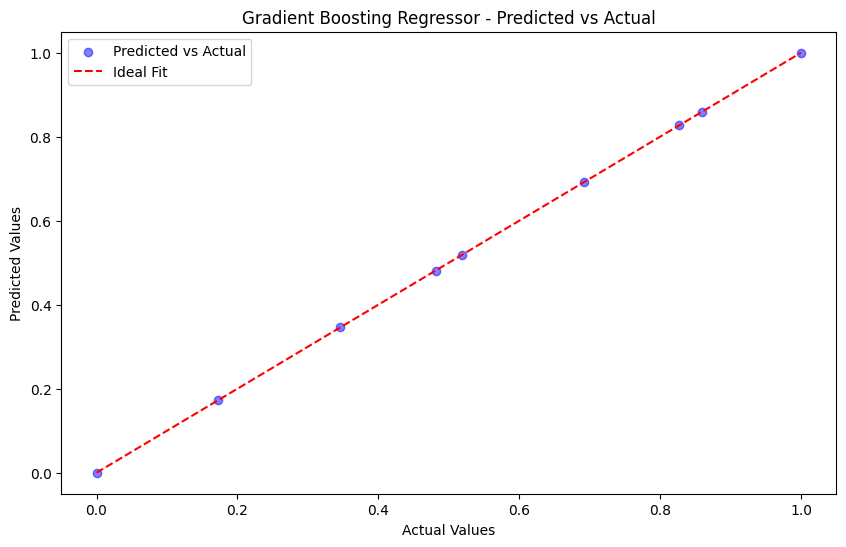

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 6: Plot Regression Line (Actual vs Predicted)
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color="blue", alpha=0.5, label="Predicted vs Actual")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--", label="Ideal Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Gradient Boosting Regressor - Predicted vs Actual")
plt.legend()
plt.show()
